<a href="https://colab.research.google.com/github/ovieimara/ITNPBD6/blob/master/ExerciseSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1a

# Introduction and Importing Data
In the Python exercises we'll look at a powerful, and well-known, Python library called scikit-learn. This is accessed programmatically using Python code, so has a steeper learning curve than Orange's GUI-driven approach, but is more flexible and powerful. Orange actually makes use of this library for some of its modelling; Orange can also be called programmatically via an API, but scikit-learn is very popular and worth knowing about in its own right.

In this exercise, we'll load the data, plot the distributions and try cleaning the data. You might have already done this in Orange and, if so, we're now repeating the same process using the same motor premiums data in Python, but the practical should work equally well on its own.

A lot of code is already provided for you so you can see what to do. Click on a cell, then control+enter will run it. At various points we'll ask you to enter some additional code, usually a modification of what you've already seen: you can do this by typing within the existing cells or by adding new ones by clicking the + icon at the top of the screen.

# Check the Data
You can skip this if you already did the exercise in Orange.

Before we go anywhere near any data mining tools, let’s take a look at our data in its raw form. Browse to the local folder where you have saved these files. Double click on MotorPremiums.csv - by default it should open up in Excel.

Scroll through the data. You can see that there are twelve columns; the first row identifies what each column contains. How many rows of data are there (that is, how many instances do we have?)  What types of data can you see?

# First Code
Now let's get started with Python.

scikit-learn uses pandas and numpy objects to contain the raw data, so we'll begin by importing them and loading the data...

In [19]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("MotorPremiums.csv")

Let's take a look at the data before doing anything else...

* How many rows (instances) are there in the data?
* How many columns (variables) are there?

We can find out these like this:

In [20]:
df.shape

(4387, 12)

These values are the number of rows and columns respectively. Do they match what you saw in Excel? (and in Orange if you tried that?)

It's also helpful to take a look at the first few rows of the data, which we can do like this:

In [21]:
df.head()

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B61470950,62,M,UK,35,0,0,1400,4,0,12,211.76
4,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49


You can also type "df" on its own to see the first and last few rows.

One more useful command is describe, which will give us summary statistics on each of the columns and can be useful for spotting any issues early on. ("include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones)

In [22]:
df.describe(include="all")

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
count,4387,4387.000000,4387,4387,4387.000000,4387.000000,4387.000000,4387.000000,4387.000000,4387,4387.000000,4387.000000
unique,4387,NaN,4,3,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,B69193007,NaN,M,UK,NaN,NaN,NaN,NaN,NaN,Garage,NaN,NaN
freq,1,NaN,2232,4380,NaN,NaN,NaN,NaN,NaN,3057,NaN,NaN
mean,NaN,49.435605,NaN,NaN,16.537041,0.813312,2.038067,1374.470025,4.306816,NaN,5.903579,220.793829
std,NaN,18.037774,NaN,NaN,13.758559,2.179899,1.424706,214.020981,1.501104,NaN,5.106129,22.207691
min,NaN,18.000000,NaN,NaN,1.000000,0.000000,0.000000,1200.000000,2.000000,NaN,1.000000,154.220000
25%,NaN,34.000000,NaN,NaN,5.000000,0.000000,1.000000,1200.000000,3.000000,NaN,2.000000,204.810000
50%,NaN,50.000000,NaN,NaN,13.000000,0.000000,2.000000,1400.000000,4.000000,NaN,4.000000,220.890000
75%,NaN,65.000000,NaN,NaN,25.000000,0.000000,3.000000,1400.000000,6.000000,NaN,9.000000,235.960000


This data set is (despite the errors you know about!) nice and clean. Many real-world data sets have missing or outlier values, duplicates, corrupted strings or some other noise that can cause trouble for our models. We'll have a brief look at data cleaning in this exercise but when you've completed the exercise it would be worth doing some further reading on approaches to cleaning data in Python (building on what you learned in ITNPBD2 if you were on that module). A few good guides are:

Brief overview: (https://towardsdatascience.com/practical-guide-to-data-cleaning-in-python-f5334320e8e)
Slightly longer overview: (https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch04.html)


Detailed, wide+flat variables, and duplicates: (https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/)
Detailed, outliers: (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
Detailed, handling missing values: (https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)
Detailed, scaling and normalising: (https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)


As well as the scikit-learn documentation on preprocessing: (https://scikit-learn.org/stable/modules/preprocessing.html)

# Variables and Types
Now we'll list the types of the columns...

In [23]:
df.dtypes

,0
ID,object
Age,int64
Gender,object
LicenceCountry,object
Yrs DL,int64
Points,int64
NCD,int64
Engine cc,int64
Ins Group,int64
Stored,object


Not quite as user friendly as Orange! However, it should be clear that the Pandas library has made a distinction between the two numeric types. int64 is an integer (discrete) and float64 is a floating point number (continuous). object is a categorical variable.

Now, take a look at each variable in turn. Do you agree with the assignment of categorical or numeric that Orange made? Add to your notes:

* For the numeric variables, which are continuous and which are discrete?
* For the categorical variables, which are nominal and which are ordinal?

Are any of the types or sub-types not present? If so, can you think of an example of a car-related variable that would be in that type?

Could any of the variables arguably be considered as more than one type?

# Distributions
Let's plot the distributions of our data...

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Yrs DL'}>,
        <Axes: title={'center': 'Points'}>],
       [<Axes: title={'center': 'NCD'}>,
        <Axes: title={'center': 'Engine cc'}>,
        <Axes: title={'center': 'Ins Group'}>],
       [<Axes: title={'center': 'Car Age'}>,
        <Axes: title={'center': 'Premium'}>, <Axes: >]], dtype=object)

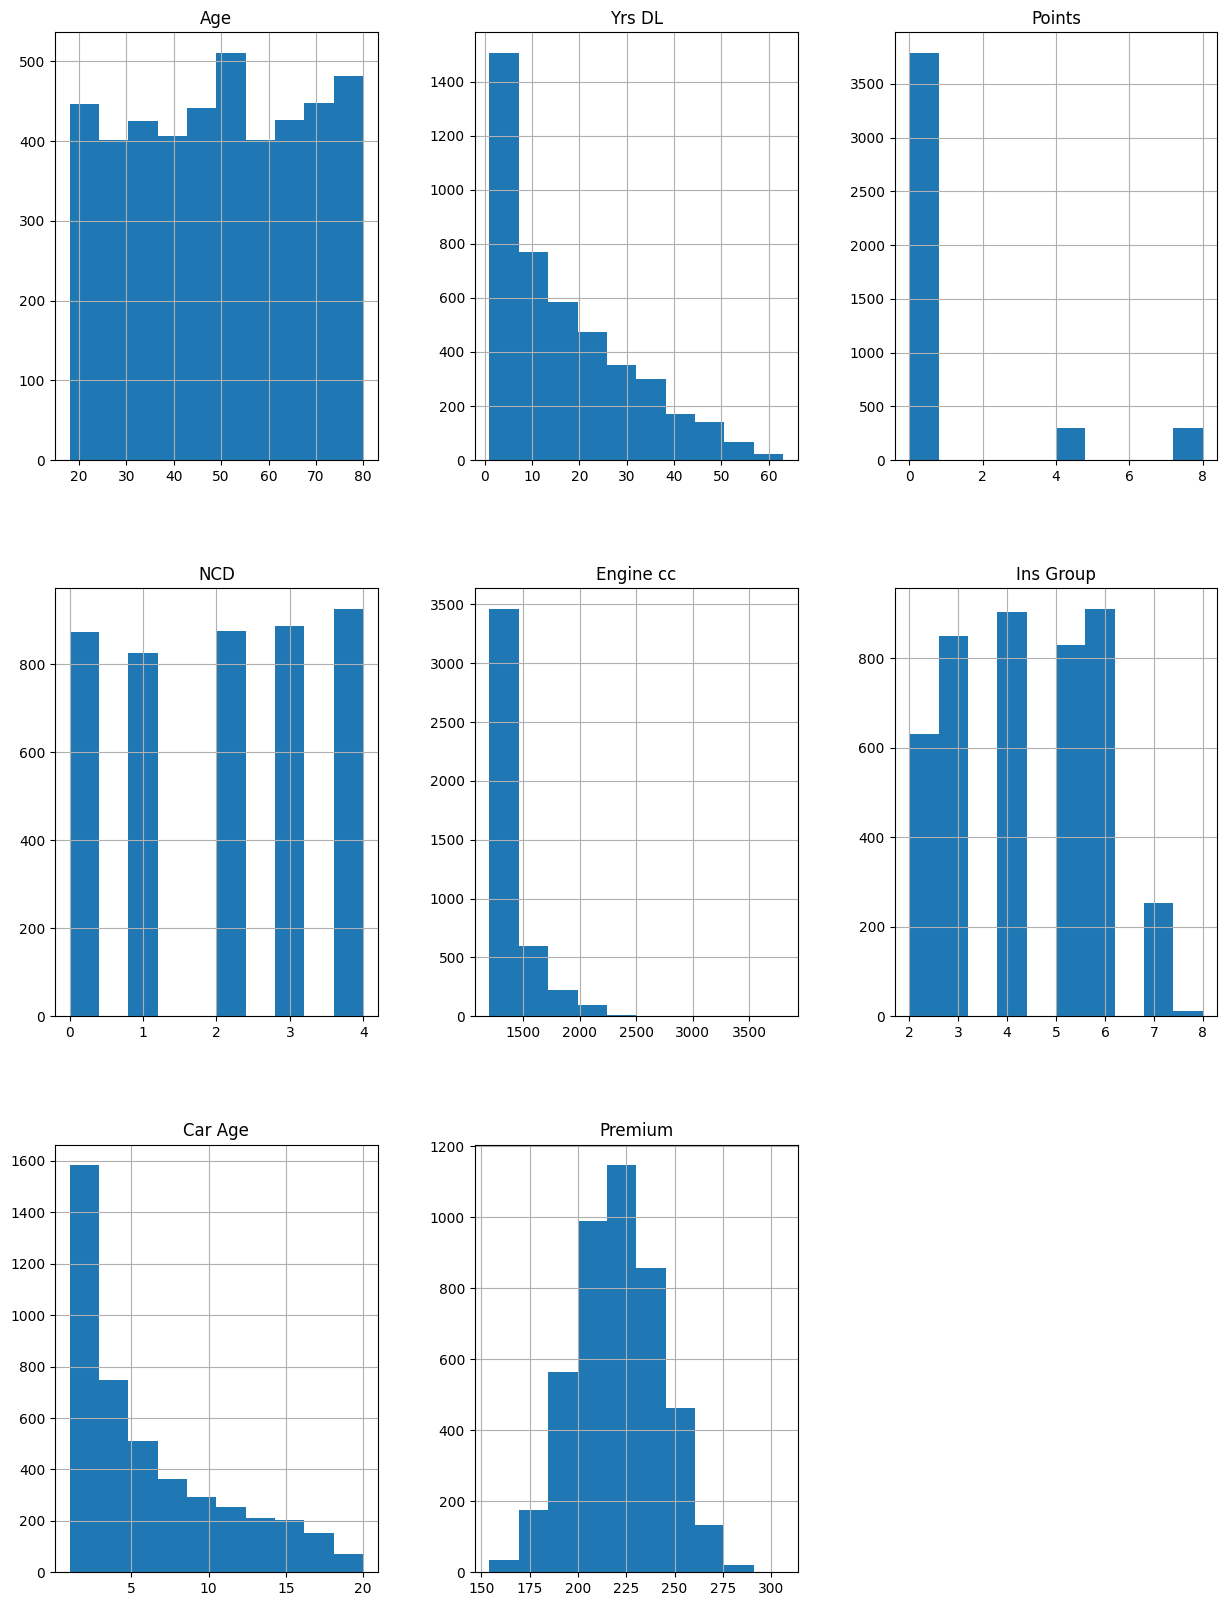

In [24]:
df.hist(figsize = (15,20))

We are missing some variables...

Those are the non-numeric ones: ID; Gender; LicenceCountry and Stored. There's not really an easy way to handle these, so we'll try a bar plot one at a time for them.

NOTE this will take around a minute to run because of the first variable, so be patient.

ID


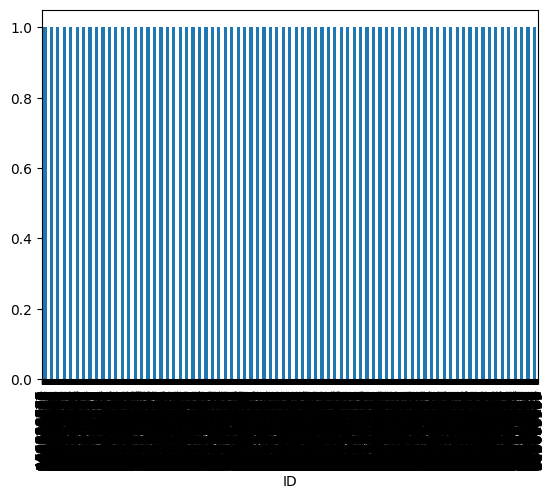

Gender


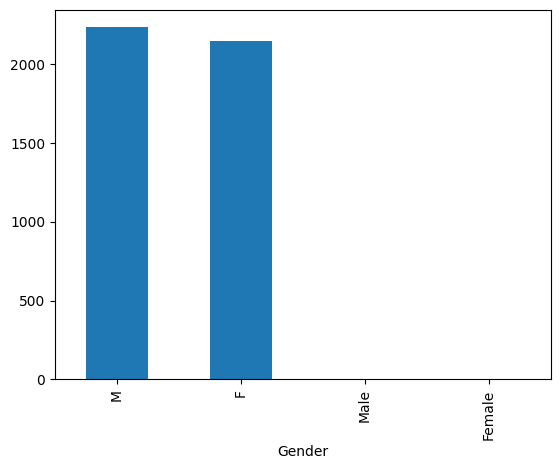

LicenceCountry


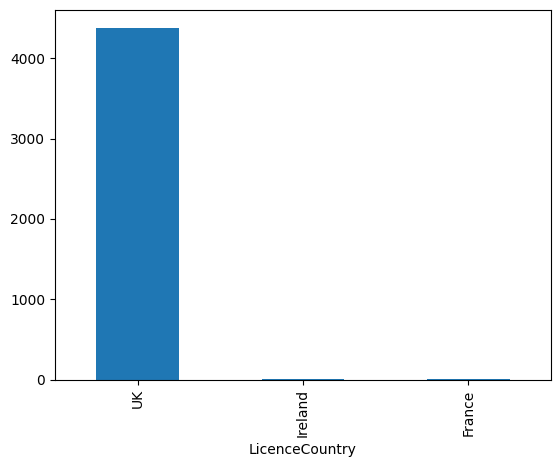

Stored


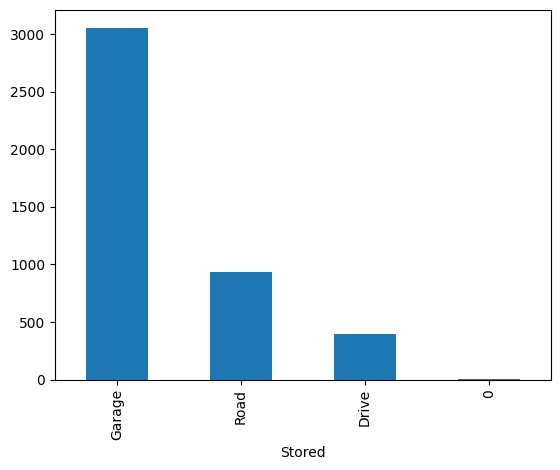

In [25]:
# this will make a bar plot for one variable...
#df['Gender'].value_counts().plot(kind='bar')

# this will list the non-numeric columns...
#df.select_dtypes(include=object)

# so loop over all of them; count each unique value, and plot...

# import matplot lib (library to do the plotting)
import matplotlib.pyplot as plt

# this will repeat the following steps for each column of type "object"
# that is, the non-numeric columns
# each time around, the column we're looking at is stored in "col"
for col in df.select_dtypes(include=object).columns:
    # print the name of the column
    print(col)

    # df[col].value_counts() gives us a pandas "series" which shows the count of each value
    # appearing in the column. Read about pandas series here:
    # https://pandas.pydata.org/pandas-docs/stable/reference/series.html
    # "series" gives us a function "plot()" that will make a plot of the values in the series
    df[col].value_counts().plot(kind='bar')

    # display the plot
    plt.show()

We can clearly see the minority values; there's also a 0 that is probably a missing value. ID is also clearly flat and wide, so we'll be dropping that when we move to modelling.

Look at each variable in turn. For each one:

- Is there an obvious trend or a shape to the distribution?
- Are any of the variables following a normal or uniform distribution?
- Given the trend, might this variable be suitable for modelling? (there are no right/wrong answers to this question at this stage)
- For numeric variables, try changing the number of bins or the bin width: too many or too few bins and it might be hard to see the trend, so where is the ideal number? Think about this especially for the Age variable.  (you'll need to look up how to do this. hint: as a starter, look at the Pandas documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) )
- Can you see anything else odd or noteworthy about the variables?



You've now completed practical 1a. We’ll come back to this again in the next exercise when we start to fix errors and clean the data.


# Practical 1b


# Data cleaning

Go back to the Distributions above, and look at each variable in turn. Make a note of the variables that show the characteristics listed below (you’ll discuss these later with your syndicate group):

* Outliers
* Minority Values
* Large Majority Values
* Flat and Wide

Are any of the above characteristics likely to be errors in the data?

Well, without giving too much away on the question above... As in the Orange exercise, Gender appears to have "Female" sometimes when it should be "F", and likewise for "Male" and "M". "Stored" seems to have a few entries that are missing, and we might want to remove the "LicenceCountry" feature as it doesn’t look all that useful. We'll also explicitly remove the ID variable as it seems to be all unique values.

First, let's make a copy of the data, selecting only the rows we want to keep. We’ll keep the records for customers in the UK, and for whom we are not missing the information about where their car is stored:

In [26]:
# copy the data frame so we've still got the original in case we need it
df_cleaned = df.copy()

# choose the rows we want to keep
df_cleaned = df_cleaned[(df_cleaned.LicenceCountry=="UK") & (df_cleaned.Stored!="0")]

# this is needed so the row numbers are still in sequence
df_cleaned.reset_index(drop=True)

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,M,UK,16,0,0,1200,4,Garage,2,195.32
1,B58763002,46,F,UK,22,8,1,1400,2,Garage,7,225.09
2,A57010377,59,F,UK,9,0,0,1400,5,Garage,14,201.08
3,B43586226,59,F,UK,3,0,4,1400,5,Road,13,251.49
4,B78248875,78,M,UK,57,4,1,1800,3,Garage,1,229.46
...,...,...,...,...,...,...,...,...,...,...,...,...
4369,A1126336,28,M,UK,8,0,3,1200,4,Garage,1,214.03
4370,B56077025,76,F,UK,41,0,4,1600,5,Road,1,265.50
4371,B30440487,50,M,UK,32,0,4,1200,2,Road,1,250.51
4372,A48556843,36,F,UK,12,8,3,1200,5,Road,1,264.92


Check it's worked: there should only be one bar now!

<Axes: xlabel='LicenceCountry'>

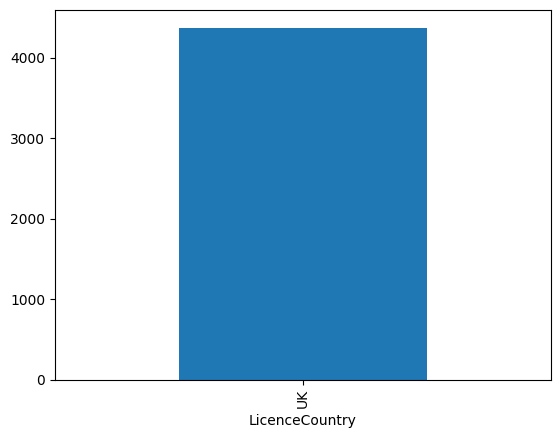

In [27]:
df_cleaned['LicenceCountry'].value_counts().plot(kind='bar')

And only three bars here...

<Axes: xlabel='Stored'>

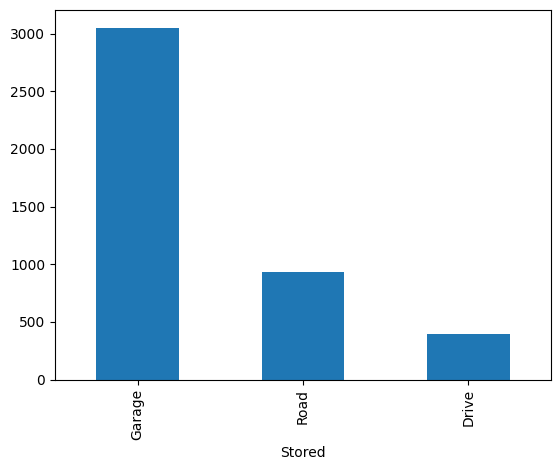

In [28]:
df_cleaned['Stored'].value_counts().plot(kind='bar')

Now, let's select only the columns we want to keep...

In [17]:
# define the list of features to keep
selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age','Premium']

# update the data frame
df_cleaned = df_cleaned[selected_features]

The histogram showed us that Gender had some 'Female' and 'Male' values, which we'll map to F and M...

<Axes: xlabel='Gender'>

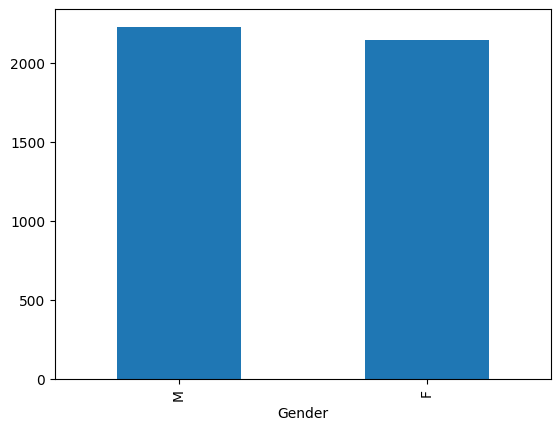

In [29]:
# we can use a dictionary to set up the mapping...
df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Female':'F','Male':'M'})

# just to check it's worked...
df_cleaned['Gender'].value_counts().plot(kind='bar')

Try filtering the data in other ways. Can you make a copy of the data frame in which the "Gender" column is removed, and in which we consider only drivers with no "points" on their licence?

In [33]:
df_filtered = df_cleaned.copy()

#  complete this
df_filtered = df_filtered[df_filtered["Points"] == 0]
df_filtered.drop(columns=["Gender"])

,ID,Age,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age,Premium
0,B69193007,52,UK,16,0,0,1200,4,Garage,2,195.32
2,A57010377,59,UK,9,0,0,1400,5,Garage,14,201.08
4,B43586226,59,UK,3,0,4,1400,5,Road,13,251.49
6,A27238029,63,UK,3,0,4,1400,6,Road,14,255.25
8,A43751408,24,UK,5,0,3,1200,3,Garage,13,214.80
...,...,...,...,...,...,...,...,...,...,...,...
4381,A52416812,80,UK,29,0,2,1200,3,Garage,15,230.09
4382,A1126336,28,UK,8,0,3,1200,4,Garage,1,214.03
4383,B56077025,76,UK,41,0,4,1600,5,Road,1,265.50
4384,B30440487,50,UK,32,0,4,1200,2,Road,1,250.51


# Encoding variables

A few of the variables above are not numeric: *Gender* and *Stored* are strings (categorical). In theory it is possible for some model types (for example, trees) to use categorical variables directly, but sklearn does not support this. So for the model to work with this data, we'll need to convert these variables to numeric values. (Orange does this automatically in the background)

sklearn provides a couple of encoders to do this:
* sklearn.preprocessing.OrdinalEncoder - for string variables where there is a natural order to the values (e.g. "light"/"medium"/"heavy") - *ordinal* variables - this will transform the values into 0,1,2,3...
* sklearn.preprocessing.OneHotEncoder - for string variables where there is no natural order to the values (e.g. place names, job titles) - *nominal* variables - this will create a new feature for each possible value, with the value 0 or 1.

You can read more about the encoders [here](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and how you might combine them for mixed-type data [here](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html). We'll come back to these next time.

In our data, *Gender* and *Stored* do not have a natural order, so we want one-hot encoding. While the encoders above are arguably more flexible, a simpler way to apply one-hot encoding is built in to pandas, and that's what we'll use...

In [34]:
df_cleaned = pd.get_dummies(df_cleaned, prefix_sep='_', drop_first=True)

This function takes a data frame and returns another data frame with the transformation applied. The argument *prefix_sep='_'* is used to make the names of the newly created features;  *drop_first=True* removes one column from the resulting dummy features; this is to avoid multicollinearity, which can be a [problem](https://www.algosome.com/articles/dummy-variable-trap-regression.html) for some model types. Let's take a look at the data now:

In [36]:
df_cleaned.head()

,Age,Yrs DL,Points,NCD,Engine cc,Ins Group,Car Age,Premium,ID_A1001197,ID_A10018047,...,ID_B99804347,ID_B99845168,ID_B99894967,ID_B99907034,ID_B99957168,ID_B99969544,ID_B99996078,Gender_M,Stored_Garage,Stored_Road
0,52,16,0,0,1200,4,2,195.32,False,False,...,False,False,False,False,False,False,False,True,True,False
1,46,22,8,1,1400,2,7,225.09,False,False,...,False,False,False,False,False,False,False,False,True,False
2,59,9,0,0,1400,5,14,201.08,False,False,...,False,False,False,False,False,False,False,False,True,False
4,59,3,0,4,1400,5,13,251.49,False,False,...,False,False,False,False,False,False,False,False,False,True
5,78,57,4,1,1800,3,1,229.46,False,False,...,False,False,False,False,False,False,False,True,True,False


You can see that we've now created some extra columns in place of Gender and Stored.

# Set the features and targets
We can now extract the columns we want for features and targets ready for passing to a model. By convention, we use names including `X` as the 2-D array of features, and `y` as the 1-D array of targets.

Here, X and y are still Pandas objects, which has the advantage that the columns still have meaningful names. Often you will see numpy arrays being used for X and y instead as that's what's used internally by sklearn. You can convert a pandas data frame to a numpy array by calling df.values or df.to_numpy() (the latter is part of later versions of Pandas and is preferred)

In [38]:
targetName="Premium"
featureNames=df_cleaned.columns[df_cleaned.columns != targetName]
X = df_cleaned[featureNames]
y = df_cleaned[targetName]

# Normalising
It's also a good idea to normalise the features: ensuring they are all in the range 0...1. The simplest approach is, for each feature, to subtract the minimum value and divide by the range. This can be done as follows:

In [41]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

Note: the scaler returns a numpy array by default but, for convenience here, we want to keep the data in a Pandas data frame, so we make a new data frame with the same column names as X.

Should you later want to apply the same scaling to new data, this can be doner by calling `mm_scaler.transform(X_test)`, where `X_test` is the variable holding the new data set. The same can be done with the encoders. How does our data look now? Rather different to when we started...

In [42]:
X

,Age,Yrs DL,Points,NCD,Engine cc,Ins Group,Car Age,ID_A1001197,ID_A10018047,ID_A10177783,...,ID_B99804347,ID_B99845168,ID_B99894967,ID_B99907034,ID_B99957168,ID_B99969544,ID_B99996078,Gender_M,Stored_Garage,Stored_Road
0,0.548387,0.241935,0.0,0.00,0.000000,0.333333,0.052632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.451613,0.338710,1.0,0.25,0.076923,0.000000,0.315789,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.661290,0.129032,0.0,0.00,0.076923,0.500000,0.684211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.661290,0.032258,0.0,1.00,0.076923,0.500000,0.631579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.967742,0.903226,0.5,0.25,0.230769,0.166667,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,0.161290,0.112903,0.0,0.75,0.000000,0.333333,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4370,0.935484,0.645161,0.0,1.00,0.153846,0.500000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4371,0.516129,0.500000,0.0,1.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4372,0.290323,0.177419,1.0,0.75,0.000000,0.500000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
y

,Premium
0,195.32
1,225.09
2,201.08
4,251.49
5,229.46
...,...
4382,214.03
4383,265.50
4384,250.51
4385,264.92


# Unbalanced Data
We’ve one more thing to try. What if your data is unbalanced? How do we sample it down to rebalance it? There isn't an easy way to get the example "churn" data that we use in the Orange version of this exercise, so we've provided it as one of the file downloads for this session. For reference, it comes from here: https://www.kaggle.com/blastchar/telco-customer-churn

In [45]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(file_path)

First, we'll take a look at the data, and our target variable *Churn*

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: xlabel='Churn'>

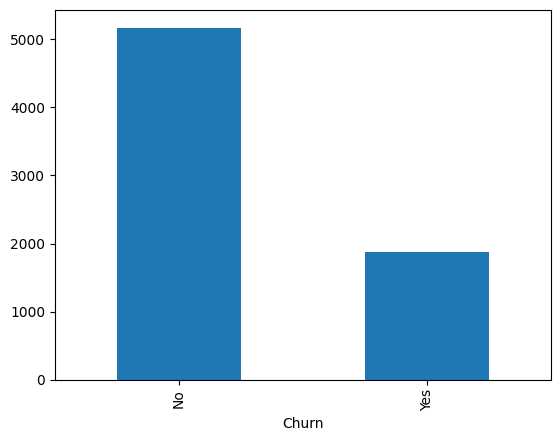

In [46]:
df['Churn'].value_counts().plot(kind='bar')

It's only two lines of code to rebalance the data in Python, but it takes some explaining...

First we identify the groups in our data that we want to balance, using the `groupby()` function. We tell the function that we want to use the values in *Churn* to make the groups. This function returns a DataFrameGroupBy object, a collection of DataFrames, one for each groups. We store the DataFrameGroupBy object in *g*.

Now we'll explain what is happening in the second line:

`g.size().min()` finds the size of the smallest group in our data. We determined this by hand in Orange.

`x.sample(v)` chooses a random set of `v` rows from the data frame `x`. We used the Data Sampler for this in Orange.

`lambda x: x.sample(g.size().min()))` is a [Lambda function](https://www.w3schools.com/python/python_lambda.asp). This basically says "every time we are given a data frame object called `x` I want you to sample some values from it to make a smaller data frame"

`g.apply(...)` is a function on the DataFrameGroupBy object. What it does is call the lambda function for each of the groups. So it's saying "run the sampling operation on each group please".

`pd.DataFrame()` joins all the groups back together into one data frame again. This was done by the Concatenate widget in Orange.

`.reset_index(drop=True)` is needed to reset the row numbers in the data frame after we're done.

You might notice that we're sampling all the groups, and this will include the smallest one, which doesn't actually need sampled. That's okay, because the kind of sampling we're doing will just get everything if the required number of samples is the same as what's already in the data frame.

In [47]:
g = df.groupby('Churn')

df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

<ipython-input-47-c41db9fce8b7>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)


Let's check the data for balance again...

<Axes: xlabel='Churn'>

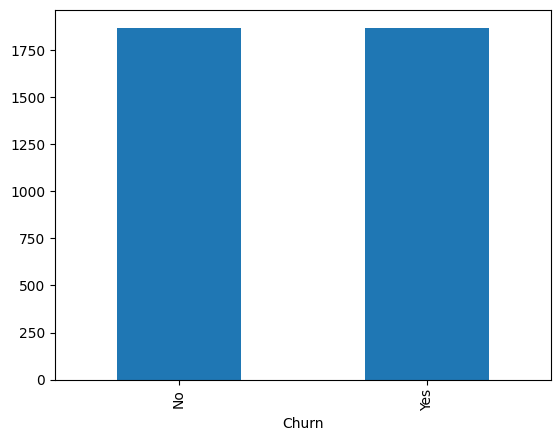

In [48]:
df['Churn'].value_counts().plot(kind='bar')

In [49]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5849-ASHZJ,Male,0,No,Yes,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,552.9,No
1,4980-URKXC,Male,0,Yes,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.85,720.05,No
2,9074-KGVOX,Male,0,Yes,Yes,50,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No
3,2091-GPPIQ,Female,0,Yes,Yes,72,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,78.95,5730.15,No
4,1986-PHGZF,Male,1,No,No,18,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),58.40,964.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1334-FJSVR,Male,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.25,24.25,Yes
3734,9079-YEXQJ,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes
3735,5909-ECHUI,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,56.25,56.25,Yes
3736,7488-MXJIV,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.65,321.65,Yes


Excellent! It's nicely balanced. Well done: that's the end of this exercise.